# Decision Tree 

## 1. Classification Tree
> 한 번 분기때 마다 변수 영역을 두 개로 구분하며,  타겟변수(Y)가 "Categorical Variable(범주형)인 변수"
- 분류나무는 구분 뒤 각 영역의 순도(homogeneity)가 증가, 불순도(impurity) 혹은 불확실성(uncertainty)이 최대한 감소하도록 하는 방향으로 학습을 진행
- 순도가 증가/불확실성이 감소하는 걸 두고 정보이론에서는 정보획득(information gain)이라고 함

> 최적의 분할 찾기
  - ⓐ 분할하기 전 불순도P를 측정한다.
  - ⓑ 분할 후 불순도M을 측정한다. 
    - 각각의 자식 노드에 대한 불순도를 측정
    - M은 자식 노드의 가중된 weighted 불순도이다.
  - ⓒ 가장 높은 gain을 산출하는 속성 테스트 조건을 선택한다.
    - 즉, 분할 후의 불순도M이 가장 낮은 조건을 선택한다.
    - gain = P - M

### Entropy information gain이란?
- 어떤 속성을 선택함으로 인해서 데이터를 더 잘 구분하게 되는 것
-  부모 노드의 Impurity와 자식노드 Impurity의 합의 차이이며, 자식노드의 impurity가 낮을수록, Information Gain의 값은 높아짐
- Binary Decision Tree를 주로 사용

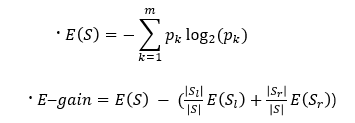

- 예시
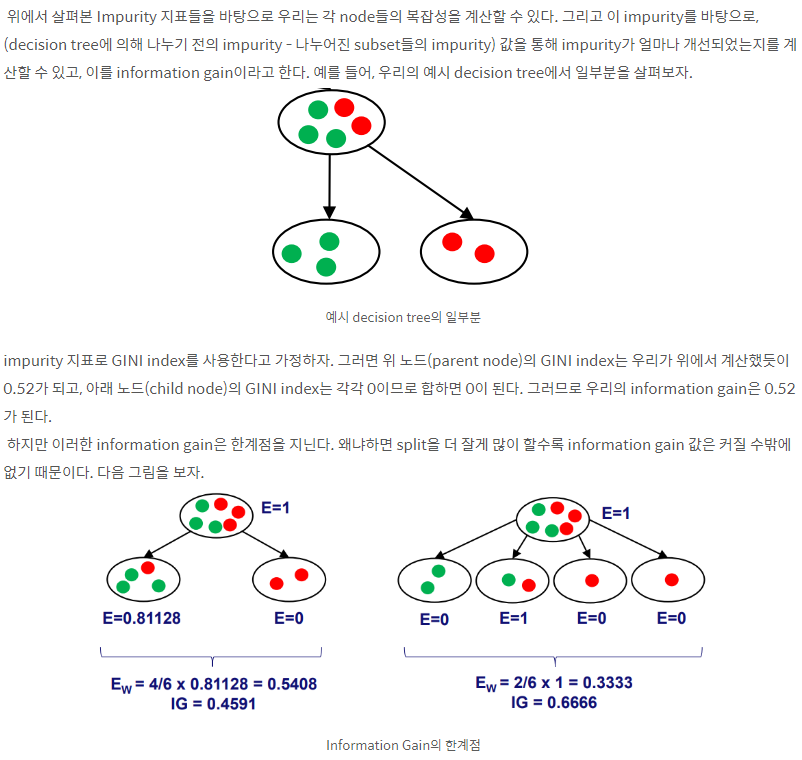

### information gain ratio란?
- C4.5 모델에서 사용하는 splitting criteria이며, entropy나 gini index의 information gain을 normalization한 형태

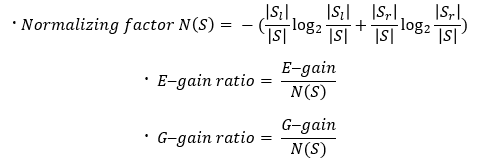

- 예시로 특정 변수의 데이터가 다양할수록 해당 데이터셋에서 변수의 영향력이 커지는 문제발생 ex)주민번호
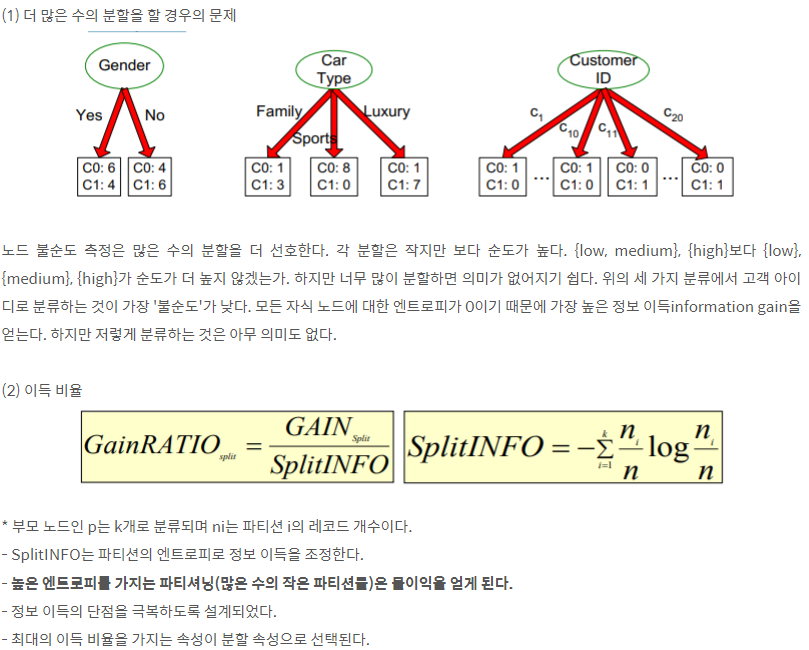

- 예시
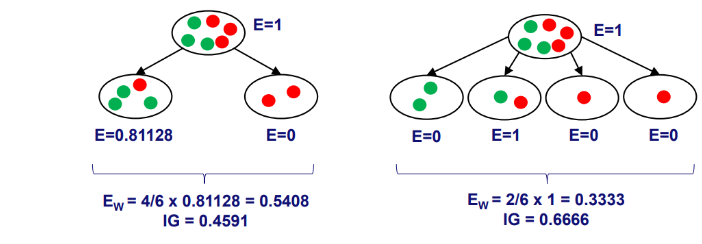

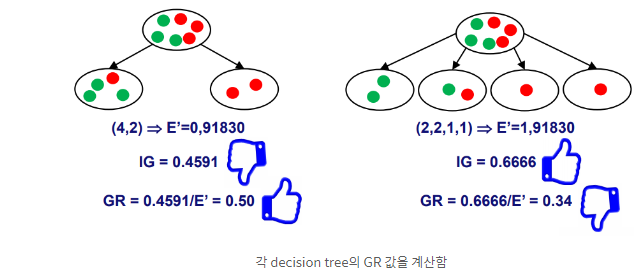

In [7]:
import os
os.chdir(r"C:\Users\User\Desktop\tree_gain_ratio (2)")
workingdir = os.path.join(os.getcwd(), '.')
os.chdir(os.path.join(workingdir, 'modules' )) 

In [8]:
os.getcwd()

'C:\\Users\\User\\Desktop\\tree_gain_ratio (2)\\modules'

### 1.1 실습에 사용할 Tool 설명 및 data 설정

In [9]:
# 기본 tool #
import pandas as pd
import numpy as np
from IPython.display import Image

In [10]:
# entropy_gain을 구하기 위한 .py파일 # 총 4개(파일 4개가 연동되어있으니 수정은 삼가해주길 바람)
from usertree import userTree as utr
import utils

#### data 기본값

In [11]:
# data 설정 #
from sklearn.datasets import load_iris
iris=load_iris()

target_att = 'target'

X_list = iris['data']
y_list = iris['target']
col_names = iris.feature_names
iris_df = pd.DataFrame(data=np.concatenate((X_list,y_list.reshape(-1,1)), axis=1), columns= ['sepal_l', 'sepal_w', 'petal_l', 'petal_w', 'target'])

in_feature = list(iris_df.columns [iris_df.columns != target_att])
classes = np.unique(y_list)

# target: 0,1,2 총 3개
print(np.unique(iris_df.target).astype('int'))
iris_df.head()

[0 1 2]


,sepal_l,sepal_w,petal_l,petal_w,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [12]:
iris_df.shape

(150, 5)

In [13]:
#train test 분리 -> data를 분리할 때 dataframe 형태로 분리
X, y = iris_df.iloc[:,:-1], iris_df.iloc[:,-1]

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
y_test.head()

114    2.0
62     1.0
33     0.0
107    2.0
7      0.0
Name: target, dtype: float64

#### ※ entropy_gain_ratio을 구하기 위한 기본 값 설정 ※

In [14]:
# DT termination criteria
## MAX_DEPTH: 기존 모델의 max_depth와 같음
## min_samples_leaf: 기존모델의 min_samples_leaf와 같음
MAX_DEPTH = 3
min_samples_leaf = 2

# data를 data frame형태로 train, test로 나눔
train_idx, test_idx = X_train.index, X_test.index
train, test = iris_df.loc[train_idx,:], iris_df.loc[test_idx,:]

### 1-2. modeling
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### 기존 모델 기준

In [15]:
# split criterion이 entropy일 때 #
from sklearn.tree import DecisionTreeClassifier

clf_tree =DecisionTreeClassifier(criterion = 'entropy', max_depth=3, random_state=0, min_samples_leaf=2) 

clf_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [16]:
# y_pred_prob: 기존 class대로 class가 될 확률을 뱉어준 형태
y_pred_prob = clf_tree.predict_proba(X_test)
y_pred_prob

array([[0.        , 0.        , 1.        ],
       [0.        , 0.97142857, 0.02857143],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.97142857, 0.02857143],
       [0.        , 0.97142857, 0.02857143],
       [0.        , 0.97142857, 0.02857143],
       [0.        , 0.4       , 0.6       ],
       [0.        , 0.97142857, 0.02857143],
       [0.        , 0.97142857, 0.02857143],
       [0.        , 0.97142857, 0.02857143],
       [0.        , 0.97142857, 0.02857143],
       [1.        , 0.        , 0.        ],
       [0.        , 0.97142857, 0.02857143],
       [0.        , 0.97142857, 0.02857143],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.97142857, 0.02857143],
       [1.

In [17]:
y_pred = clf_tree.predict(X_test)
print(y_pred)

[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 1. 0. 0. 2. 1. 0. 0.
 1. 0. 0. 1. 1. 0.]


In [18]:
train_acc = clf_tree.score(X_train,y_train)
test_acc = clf_tree.score(X_test,y_test)

print(f'Train_Accuracy: {train_acc}')
print(f'Test_Accuracy: {test_acc}')

Train_Accuracy: 0.9666666666666667
Test_Accuracy: 0.9666666666666667


###  새 모델기준

In [19]:
# 모델 생성 #
## min_samples_leaf: 노드의 최소 데이터 수
## MAX_DEPTH: 나무의 가지 수
## params: 분기기준 -> entropy, gini, entropy_GR 총 3개 사용가능
CART_entropy_GR_ins = utr(min_samples_leaf, MAX_DEPTH, params ='entropy')

In [20]:
# 모델 피팅 # 
## train: dataframe형태로 된 data
## target_attribute_name: target data로 설정된 y값 이름
entropy_GR_tree, entropy_GR_pprint_tree = CART_entropy_GR_ins.fit(train, target_attribute_name = "target")  

In [21]:
## CART_entropy_GR_tree: tree에서 분리된 노드들의 분기기준과 data의 index, target(=class)가 출력 - 성능측정용
## CART_entropy_GR_graph_tree: tree 그래프를 생성하기 위한 값 저장 
CART_entropy_GR_tree, CART_entropy_GR_graph_tree = \
                CART_entropy_GR_ins.tree, CART_entropy_GR_ins.graph_tree        

In [22]:
# y예측값
CART_entropy_GR_tree

{'petal_l < 2.35': [0,
  27    0
  18    0
  2     0
  43    0
  10    0
  30    0
  48    0
  13    0
  20    0
  15    0
  3     0
  6     0
  12    0
  46    0
  11    0
  41    0
  1     0
  42    0
  4     0
  17    0
  38    0
  5     0
  0     0
  34    0
  28    0
  35    0
  23    0
  31    0
  32    0
  14    0
  19    0
  29    0
  49    0
  25    0
  39    0
  36    0
  21    0
  9     0
  47    0
  Name: target, dtype: int64],
 'petal_l >= 2.35': {'petal_w < 1.75': {'petal_l < 4.95': [1,
    84     1
    59     1
    61     1
    92     1
    60     1
    69     1
    56     1
    80     1
    106    2
    50     1
    85     1
    94     1
    64     1
    89     1
    91     1
    95     1
    52     1
    98     1
    68     1
    96     1
    53     1
    55     1
    75     1
    74     1
    57     1
    65     1
    99     1
    82     1
    79     1
    72     1
    81     1
    58     1
    88     1
    87     1
    67     1
    Name: target, dtype: int64],
   'pe

In [23]:
# 그래프 생성용 데이터
CART_entropy_GR_graph_tree

{'[label="petal_l < 2.35\\nsamples = 120\\nsamples/class = [39, 37, 44]"] ;': '[label="predict = 0\\nhomogeneity = 1.0\\ncoverage = 0.325\\nsamples/class = [39, 0, 0]"] ;',
 '[label="petal_l >= 2.35\\nsamples = 120\\nsamples/class = [39, 37, 44]"] ;': {'[label="petal_w < 1.75\\nsamples = 81\\nsamples/class = [0, 37, 44]"] ;': {'[label="petal_l < 4.95\\nsamples = 40\\nsamples/class = [0, 36, 4]"] ;': '[label="predict = 1\\nhomogeneity = 0.971\\ncoverage = 0.292\\nsamples/class = [0, 34, 1]"] ;',
   '[label="petal_l >= 4.95\\nsamples = 40\\nsamples/class = [0, 36, 4]"] ;': '[label="predict = 2\\nhomogeneity = 0.6\\ncoverage = 0.042\\nsamples/class = [0, 2, 3]"] ;'},
  '[label="petal_w >= 1.75\\nsamples = 81\\nsamples/class = [0, 37, 44]"] ;': {'[label="petal_l < 4.85\\nsamples = 41\\nsamples/class = [0, 1, 40]"] ;': '[label="predict = 1\\nhomogeneity = 0.5\\ncoverage = 0.017\\nsamples/class = [0, 1, 1]"] ;',
   '[label="petal_l >= 4.85\\nsamples = 41\\nsamples/class = [0, 1, 40]"] ;': '[

### 1-3. visualizations

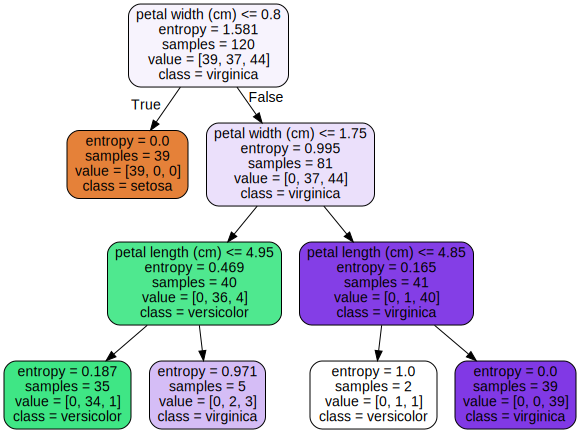

In [24]:
# 기존 모델용 # entropy일때
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf_tree, out_file=None, filled=True, rounded=True,
                                feature_names=col_names,  
                                class_names=iris.target_names)

graph = graphviz.Source(dot_data)  
graph

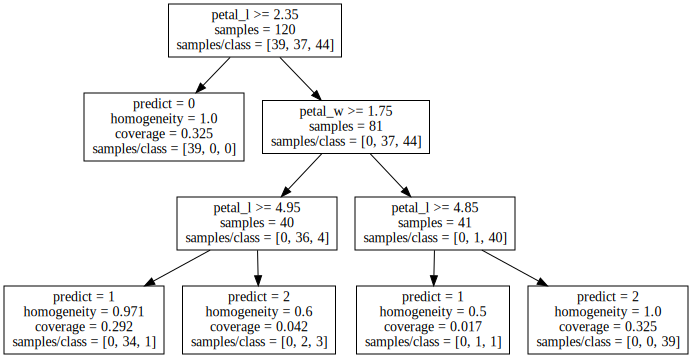

In [25]:
# 새 모델용 # entropy일때 
import graphviz
graph_dir = 'graph'
node, edge = CART_entropy_GR_ins.graph.tree_to_graph(CART_entropy_GR_graph_tree)
tree_graph = graphviz.Source(node + edge+'\n}')
tree_graph

# 유의사항: 왼쪽 화살표가 False, 오른쪽 화살표가 True임

In [26]:
# PDF 파일 출력 #
graph_dir = 'graph'
d_set_name = 'iris'
tree_graph.render('{}/CART_entropy_GR_{}_test'.format(graph_dir, d_set_name))

'graph\\CART_entropy_GR_iris_test.pdf'

### 1-4. Data Dummies
> - 모델에 데이터를 넣기 위해 문자로 된 범주형 데이터를 각 컬럼별 수치데이터 형태로 변경 후 분석 
- one-hot encoding과 흡사
- 0 or 1의 값을 가짐
- 기존 범주형 변수의 범주 개수보다 1개 적게 만들어짐
- factorize: 1차원, Dummies: n차원

### car data information

In [27]:
# 경로 설정 #
os.chdir(r'C:\\Users\\User\\Desktop\\tree_gain_ratio')
os.getcwd()

'C:\\Users\\User\\Desktop\\tree_gain_ratio'

In [28]:
car_data = pd.read_csv('./dataset/car.csv',names=['buying','maint','doors','persons','lug_boot','safety','class'],)
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


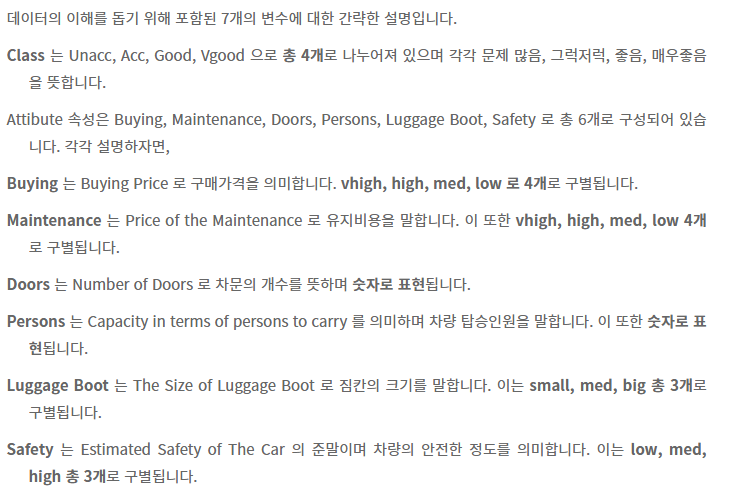

In [29]:
Image("img/car.png",  width=500, height=500)

In [30]:
X_ = car_data.iloc[:,:-1]
y_ = car_data.iloc[:,-1]

In [31]:
# 모델용 # entropy일때 
target_att = 'class'
in_feature = list(car_data.columns [car_data.columns != target_att])

cate_col = [col for col in in_feature if not np.issubdtype(X_[col].dtype, \
    np.number)]

# X의 string 값을 dummey variable로 변환 
X_dummies= pd.get_dummies(X_.loc[:,in_feature], columns=cate_col)
feature_names = X_dummies.columns

# y의 string 값을 numeric으로 변환 
y_, class_names = pd.factorize(car_data[target_att])

# train, test = 8:2, random split
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_dummies, y_, test_size=0.2, random_state=0)

In [32]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf = 10,random_state=0)
dtree.fit(X_train_, y_train_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [33]:
# use the model to make predictions with the test data
y_pred = dtree.predict(X_test_)
# how did our model perform?
count_misclassified = (y_test_ != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

accuracy_tr = dtree.score(X_train_, y_train_)
accuracy_te = dtree.score(X_test_, y_test_)
print('Train_Accuracy: {:.2f}'.format(accuracy_tr))
print('Test_Accuracy: {:.2f}'.format(accuracy_te))

Misclassified samples: 53
Train_Accuracy: 0.88
Test_Accuracy: 0.85


In [34]:
# 새 모델용 
target_att = 'class'
in_feature = list(car_data.columns [car_data.columns != target_att])

# DT termination criteria
## MAX_DEPTH: 기존 모델의 max_depth와 같음
## min_samples_leaf: 기존모델의 min_samples_leaf와 같음
MAX_DEPTH = 6
min_samples_leaf = 10

# 만약 categorical data가 string 형태로 되어있는 column이라면 numeric으로 변환
## cate_col: column중에 categorical data 있는지 없는지 판단
cate_col = [col for col in in_feature if not np.issubdtype(X_[col].dtype, \
    np.number)]

# X의 string 값을 dummey variable로 변환 
X_dummies= pd.get_dummies(X_.loc[:,in_feature], columns=cate_col)
X_dummies

# y의 string 값을 numeric으로 변환 
y_, class_names = pd.factorize(car_data[target_att])

In [35]:
# factorize 예시
y_

array([0, 0, 0, ..., 0, 3, 2], dtype=int64)

In [36]:
# dummeie variable 예시
X_dummies

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
1724,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
1725,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,1,0
1726,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1


In [37]:
# train, test = 8:2, random split
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_dummies, y_, test_size=0.2, random_state=0)

y_ = pd.DataFrame(y_, columns=['class'])
car_data_dum = pd.concat([X_dummies, y_], axis=1)

# data를 data frame형태로 train, test로 나눔
train_idx, test_idx = X_train_.index, X_test_.index
train, test = car_data_dum.loc[train_idx,:], car_data_dum.loc[test_idx,:]

train

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med,class
1649,0,1,0,0,0,1,0,0,0,1,...,1,0,0,0,0,1,1,0,0,0
1465,0,1,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
361,0,0,0,1,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
315,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1372,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,1,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1
1216,0,0,1,0,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
1653,0,1,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0
559,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0


In [38]:
# 모델 생성 #
## min_samples_leaf: 노드의 최소 데이터 수
## MAX_DEPTH: 나무의 가지 수
## params: 분기기준 -> entropy, gini, entropy_GR 총 3개 사용가능
## entropy_GR: entropy gain ratio

CART_entropy_GR_ins = utr(min_samples_leaf, MAX_DEPTH, params ='entropy_GR')

In [39]:
# 모델 피팅 # 
## train: dataframe형태로 된 data
## target_attribute_name: target data로 설정된 y값 이름
entropy_GR_tree, entropy_GR_pprint_tree = CART_entropy_GR_ins.fit(train, target_attribute_name = "class")  

In [40]:
## CART_entropy_GR_tree: tree에서 분리된 노드들의 분기기준과 data의 index, target(=class)가 출력
## CART_entropy_GR_graph_tree: tree 그래프를 생성하기 위한 값 저장 
CART_entropy_GR_tree, CART_entropy_GR_graph_tree = \
                CART_entropy_GR_ins.tree, CART_entropy_GR_ins.graph_tree

In [41]:
# 성능측정 #
train_CART_entropy_GR_all_pred, train_CART_entropy_GR_all_pred_prob \
                = CART_entropy_GR_ins.predict(train, CART_entropy_GR_tree)

test_CART_entropy_GR_all_pred, test_CART_entropy_GR_all_pred_prob \
    = CART_entropy_GR_ins.predict(test, CART_entropy_GR_tree)

In [42]:
classes = np.unique(train['class'])

# list로 변환 #

train_CART_entropy_GR_all_met = utils.perform_check(train['class'], \
         train_CART_entropy_GR_all_pred, \
         train_CART_entropy_GR_all_pred_prob,\
         len(classes), CART_entropy_GR_ins.CLASS_DICT_)

test_CART_entropy_GR_all_met = utils.perform_check(test['class'], \
         test_CART_entropy_GR_all_pred, \
         test_CART_entropy_GR_all_pred_prob, \
         len(classes), CART_entropy_GR_ins.CLASS_DICT_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
print(f'train_accuracy: {train_CART_entropy_GR_all_met[0].round(2)}')
print(f'test_accuracy: {test_CART_entropy_GR_all_met[0].round(2)}')

train_accuracy: 0.88
test_accuracy: 0.85


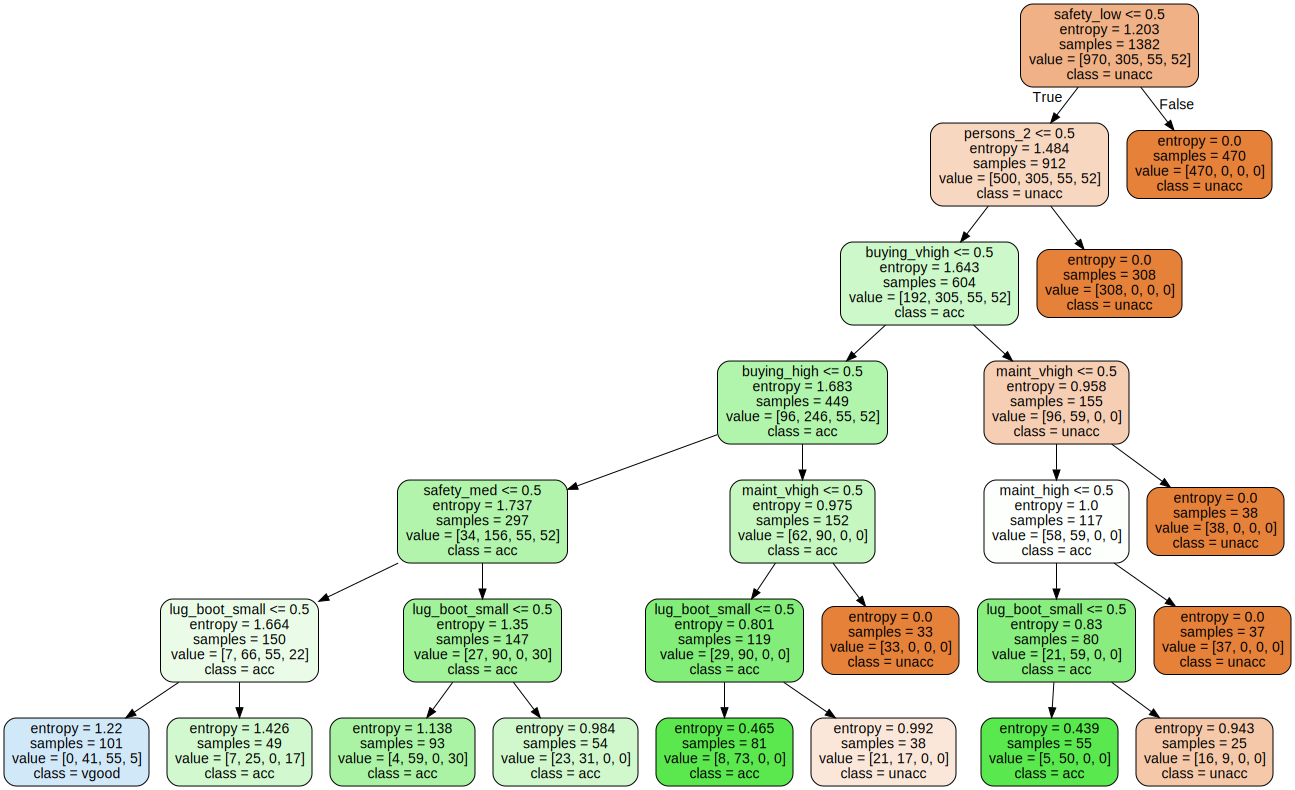

In [44]:
import graphviz
dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names,  
                                class_names=class_names)

graph = graphviz.Source(dot_data)  
graph

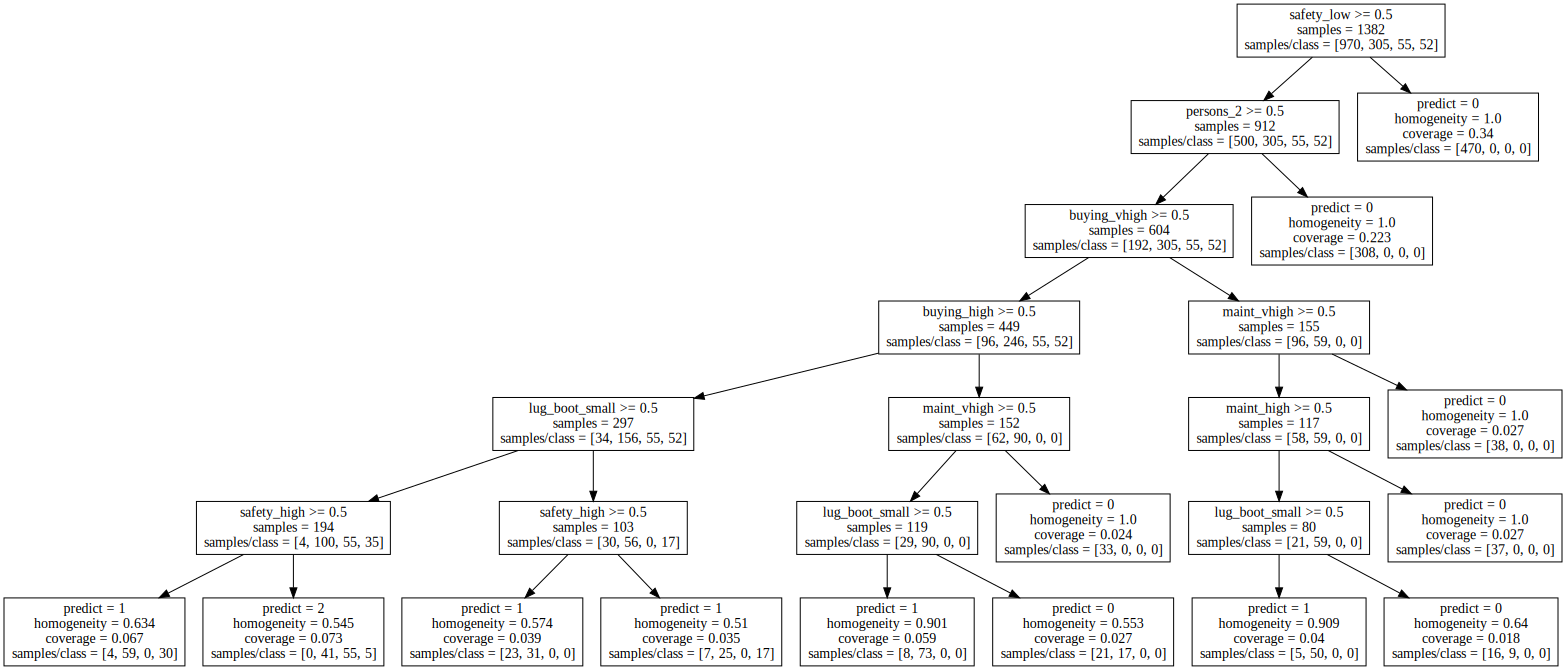

In [45]:
# 새 모델용 # entropy_gain_ratio일때 # 왼쪽이 False, 오른쪽이 True
import graphviz
graph_dir = 'graph'
node, edge = CART_entropy_GR_ins.graph.tree_to_graph(CART_entropy_GR_graph_tree)
tree_graph = graphviz.Source(node + edge+'\n}')
tree_graph

# 유의사항: 왼쪽 화살표가 False, 오른쪽 화살표가 True임

In [46]:
# 번외
from scipy.stats import entropy

print(f'entropy={entropy([4, 59, 0, 30], base=2)}')

entropy=1.1382700177682015
